In [1]:
import vice
import arya
import matplotlib.pyplot as plt
import pandas as pd
from surp import ViceModel
import numpy as np

/users/PAS2232/aeyobd/.local/lib/python3.10/site-packages/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
ls ../../models/C11_f0.2

27492688.out    model.json   run.py                    yield_params.json
milkyway.vice/  params.json  stars_gaussian_walks.dat


In [3]:
walks = pd.read_csv("../../models/C11_f0.2/stars_gaussian_walks.dat", memory_map=True) # requires a bit of memory

In [4]:
t_end = np.max(walks.t)

In [5]:
t_end

13.18

In [6]:
walks.set_index(["N", "t"], inplace=True) # multiindex makes this much easier...

In [7]:
df_end = walks.xs(t_end, level="t")

In [8]:
df_end.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       36685, 36686, 36687, 36688, 36689, 36690, 36691, 36692, 36693, 36694],
      dtype='int64', name='N', length=36695)

In [9]:
Ns = df_end.index.values # last slice contains every value

In [10]:
t_birth = np.empty(len(Ns))
dR = np.zeros(len(Ns))
for n in Ns:
    print(f"{n} / {Ns[-1]}", end="\r")
    ws = walks.loc[n, :]
    t_birth[n] = ws.index[0]
    dR[n] = ws.R[t_end] - ws.R[t_birth[n]]

/users/PAS2232/aeyobd/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'density')

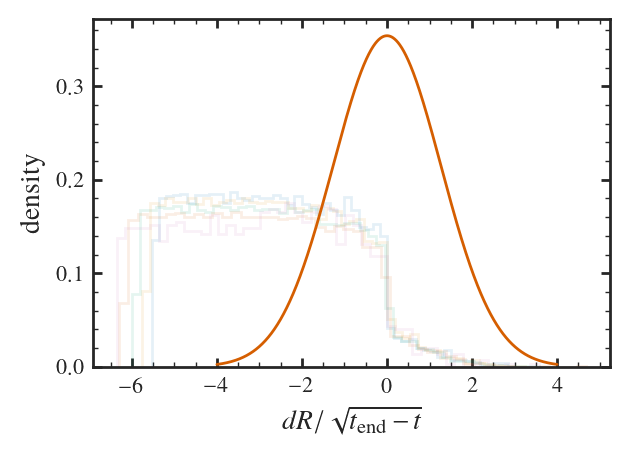

In [11]:
for t in np.arange(0.0, 13.0):
    dt = 0.5
    filt = t_birth > t - dt
    filt &= t_birth < t + dt
    plt.hist(dR[filt]/np.sqrt(13.2 - t_birth[filt]), 50, histtype="step", density=True, alpha=0.1)
    
x = np.linspace(-4, 4, 1000)
σ = 1.27
y = 1/np.sqrt(2*np.pi * σ) * np.exp(-x**2 / (2*σ**2))
plt.plot(x, y)
plt.xlabel(r"$dR / \sqrt{t_{\rm  end} - t}$")
plt.ylabel("density")

all time bins appear to be well approximated by the gaussian (yay). The overabundance at 0 is likely due to boundry conditions (r=0 and r=20).

Text(0, 0.5, 'dr')

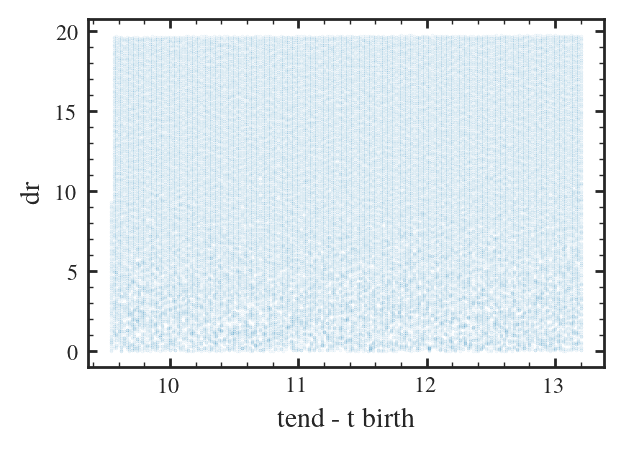

In [12]:
plt.scatter(13.2 - t_birth, np.abs(dR), s=0.05, alpha=0.1)
plt.xlabel("tend - t birth")
plt.ylabel('dr')

In [13]:
z0 = 80

In [14]:
filt = df_end.zone == z0

In [15]:
idx = filt.index[filt].values

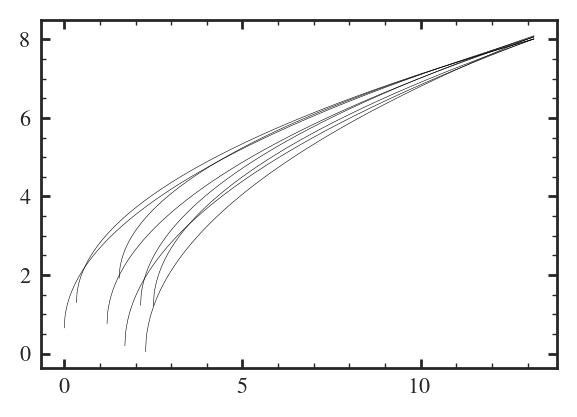

In [16]:
for N in idx:
    w = walks.loc[N, :]
    plt.plot(w.index, w.R, color="k", lw=0.2, alpha=1)
    

In [18]:
gaus = ViceModel.from_saved("../../models/C11_f0.2/model.json")

FileNotFoundError: [Errno 2] No such file or directory: '../../models/C11_f0.2/model.json'

In [27]:
s = gaus.stars

(array([ 23.,  47., 102., 127., 117., 261., 209., 283., 242., 209., 351.,
        442., 312., 451., 500., 425., 593., 435., 521., 457., 521., 520.,
        482., 463., 517., 456., 455., 421., 348., 307., 260., 205., 172.,
        186., 124.,  80.,  72.,  63.,  55.,  39.,  34.,  36.,  20.,   7.,
         18.,  10.,   4.,   9.,   5.,   4.]),
 array([ 0.05 ,  0.356,  0.662,  0.968,  1.274,  1.58 ,  1.886,  2.192,
         2.498,  2.804,  3.11 ,  3.416,  3.722,  4.028,  4.334,  4.64 ,
         4.946,  5.252,  5.558,  5.864,  6.17 ,  6.476,  6.782,  7.088,
         7.394,  7.7  ,  8.006,  8.312,  8.618,  8.924,  9.23 ,  9.536,
         9.842, 10.148, 10.454, 10.76 , 11.066, 11.372, 11.678, 11.984,
        12.29 , 12.596, 12.902, 13.208, 13.514, 13.82 , 14.126, 14.432,
        14.738, 15.044, 15.35 ]),
 [<matplotlib.patches.Polygon at 0x2aed584152b0>])

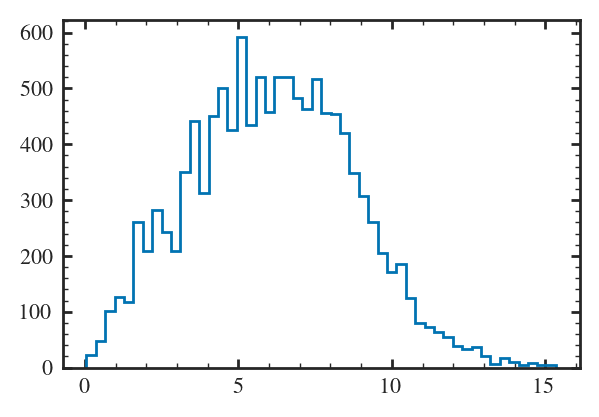

In [10]:
plt.hist(s.r_origin * 10, 50, histtype="step")

In [11]:
su = gaus.stars_unsampled

In [12]:
su

,formation_time,zone_origin,zone_final,mass,abs_z,r_origin,r_final,FE_H,O_H,MG_H,...,N_MG,C_FE,C_O,C_MG,C_N,z,M_H,age,O_MG,high_alpha
0,0.00,0.0,6.0,0.0,0.0,0.005,0.065,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
1,0.00,1.0,0.0,0.0,0.0,0.015,0.005,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
2,0.00,2.0,0.0,0.0,0.0,0.025,0.005,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
3,0.00,3.0,10.0,0.0,0.0,0.035,0.105,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
4,0.00,4.0,0.0,0.0,0.0,0.045,0.005,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,13.18,195.0,195.0,0.0,0.0,1.955,1.955,16.293224,16.457632,16.457172,...,-0.257015,0.033478,-0.130930,-0.130469,0.126545,3.497777e+14,16.397664,0.00,0.000461,True
131996,13.18,196.0,196.0,0.0,0.0,1.965,1.965,16.253208,16.419084,16.418624,...,-0.256828,0.034259,-0.131617,-0.131157,0.125672,3.198858e+14,16.358867,0.00,0.000460,True
131997,13.18,197.0,197.0,0.0,0.0,1.975,1.975,16.189015,16.359585,16.359124,...,-0.260852,0.036290,-0.134280,-0.133819,0.127033,2.782187e+14,16.298258,0.00,0.000461,True
131998,13.18,198.0,198.0,0.0,0.0,1.985,1.985,15.869000,16.056241,16.055781,...,-0.278705,0.042713,-0.144529,-0.144068,0.134637,1.370329e+14,15.990697,0.00,0.000460,True


(array([ 7.,  5.,  6., 10.,  6., 23., 28., 20., 28., 37., 42., 49., 60.,
        76., 48., 30., 29., 33., 17., 19.,  5.,  5.,  2.,  2.,  4.,  0.,
         0.,  1.,  2.,  1.]),
 array([ 0.        ,  0.63666667,  1.27333333,  1.91      ,  2.54666667,
         3.18333333,  3.82      ,  4.45666667,  5.09333333,  5.73      ,
         6.36666667,  7.00333333,  7.64      ,  8.27666667,  8.91333333,
         9.55      , 10.18666667, 10.82333333, 11.46      , 12.09666667,
        12.73333333, 13.37      , 14.00666667, 14.64333333, 15.28      ,
        15.91666667, 16.55333333, 17.19      , 17.82666667, 18.46333333,
        19.1       ]),
 [<matplotlib.patches.Polygon at 0x2aed4a9bfdc0>])

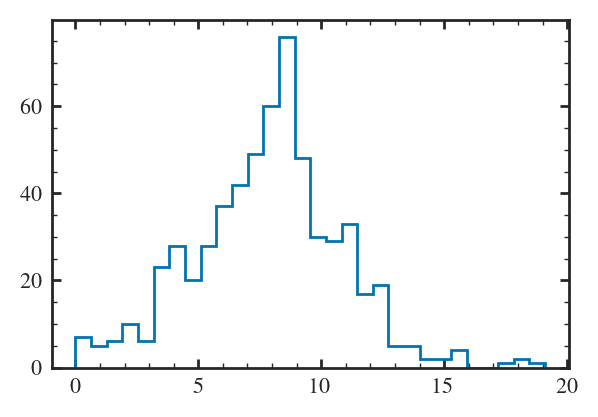

In [19]:
plt.hist(su[su.zone_final == z0].zone_origin / 10, 30, histtype="step")

In [ ]:
walks[filt]

/tmp/slurmtmp.26654641/ipykernel_236414/3336619330.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  walks[filt]


In [ ]:
R0 = 

(array([  2.,   2.,   0.,   4.,   3.,   6.,  16.,  25.,  49.,  43.,  80.,
        106.,  74.,  53.,  35.,  40.,  27.,  13.,   7.,  10.]),
 array([-3.11156466, -2.15528332, -1.19900199, -0.24272066,  0.71356067,
         1.66984201,  2.62612334,  3.58240467,  4.538686  ,  5.49496733,
         6.45124867,  7.40753   ,  8.36381133,  9.32009266, 10.276374  ,
        11.23265533, 12.18893666, 13.14521799, 14.10149933, 15.05778066,
        16.01406199]),
 [<matplotlib.patches.Polygon at 0x2b2d5b8236d0>])

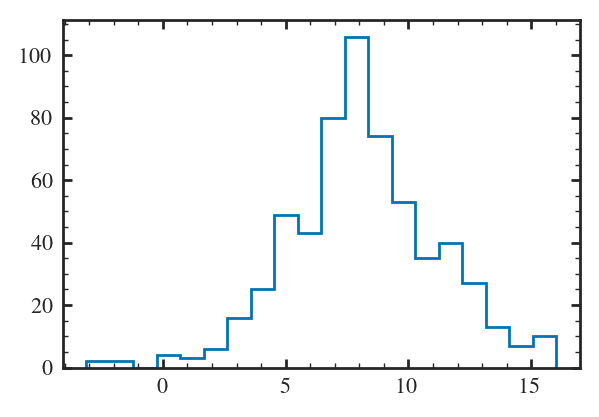

In [26]:
plt.hist(dR[filt] + z0/10, 20, histtype="step")